In [1]:
import torch.utils.data as data
import torch
from torchvision import transforms
from PIL import Image
import sys
sys.path.append('..')
# from config import INPUT_SIZE

class GetLoader(data.Dataset):
    def __init__(self, data_root, data_list, transform=None):
        self.transform = transform
        self.data_root = data_root
       # print(self.data_root)
        f = open(self.data_root + data_list, 'r')
        data_list = f.readlines()
        f.close()

        self.n_data = len(data_list)

        self.img_paths = []
        self.labels = []

        for data in data_list:
            image_path = data[:-1]
            label = image_path.split('/')[1]
            self.img_paths.append(image_path)
            self.labels.append(label)

        print(len(set(self.labels)))

        self.label_dict = {}
        for i, label in enumerate(sorted(list(set(sorted(self.labels))))):
            self.label_dict[label] = i
            
        print(self.label_dict)

        

    def __getitem__(self, item):

     #   print(self.data_root)
        img_path, label= self.img_paths[item], self.labels[item]
        #img_path_full = os.path.join(self.data_root, img_path)
        img_path_full = self.data_root+img_path
      #  print(img_path_full)
        img = Image.open(img_path_full).convert('RGB')
        # label = np.array(label,dtype='float32')
        label = self.label_dict[label]
        if self.transform is not None:
            img = self.transform(img)

        return img, label

    def __len__(self):
        return self.n_data



In [2]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [33]:
total_trainset = GetLoader(data_root='/userdata/smetzger/data/logos/train_and_test/train/',
        data_list='train_images_root.txt',
        transform=transforms.Compose([
                        transforms.Resize((600, 600), Image.BILINEAR),
                        transforms.RandomCrop((448,448)),
                        transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                         normalize,
        ]))

2341
{'100 Grand Bar': 0, '100 anos': 1, '1800 Tequila': 2, '24seven': 3, 'A-bike': 4, 'A. Fernandez': 5, 'A1 Steak Sauce': 6, 'ABLE': 7, 'ABX Air': 8, 'AC': 9, 'ACID': 10, 'AEK': 11, 'AERIAL7': 12, 'AEROBED': 13, 'AICO': 14, 'ALAN': 15, 'ALCO': 16, 'AMD': 17, 'AMT Coffee': 18, 'ANCAP': 19, 'AND1': 20, 'AOC': 21, 'APAP': 22, 'APCO': 23, 'ARCO': 24, 'ASCASO': 25, 'ASL': 26, 'AVO': 27, 'AVON': 28, 'AWA': 29, 'AXA': 30, 'Abici': 31, 'Abuelita': 32, 'Accel': 33, 'Ace': 34, 'Ace Cider': 35, 'Acer': 36, 'Acerr': 37, 'Acorn': 38, 'Acqua Panna': 39, 'Acti-V': 40, 'Acura': 41, 'Adan y Eva': 42, 'Addidas': 43, 'Ades': 44, 'Adio': 45, 'Admiral': 46, 'Advent': 47, 'Aero Contractors': 48, 'Aetrex': 49, 'After Eight': 50, 'Agfa': 51, 'Agio': 52, 'Agip': 53, 'Aida': 54, 'Aim': 55, 'Ainol': 56, 'Aiptek': 57, 'Air Cargo Carriers': 58, 'Air Crisps': 59, 'Air Evac': 60, 'Air Sunshine': 61, 'Air Transport International': 62, 'AirTran Airways': 63, 'Airfix': 64, 'Airwaves': 65, 'Akai': 66, 'Akubra': 67, 'A

In [34]:
i, k = total_trainset[9000]

In [35]:
i

tensor([[[-0.7650, -0.4911, -0.2342,  ...,  1.2043,  1.2385,  1.2728],
         [-0.7308, -0.4739, -0.2342,  ...,  1.4954,  1.5468,  1.5810],
         [-0.7137, -0.4911, -0.2684,  ...,  1.7694,  1.8208,  1.8550],
         ...,
         [ 2.2489,  2.2147,  2.1975,  ...,  1.5639,  1.7694,  1.9920],
         [ 2.2489,  2.2318,  2.2147,  ...,  1.1529,  1.4440,  1.7352],
         [ 2.2489,  2.2318,  2.2147,  ...,  0.7419,  1.1187,  1.4954]],

        [[-1.5980, -1.4055, -1.2304,  ..., -1.0028, -1.0203, -1.0203],
         [-1.5980, -1.4405, -1.3004,  ..., -1.0028, -1.0028, -1.0203],
         [-1.5980, -1.4930, -1.3880,  ..., -1.0203, -1.0203, -1.0203],
         ...,
         [ 2.4286,  2.3936,  2.3761,  ...,  1.8508,  2.0609,  2.2885],
         [ 2.4286,  2.4111,  2.3936,  ...,  1.4482,  1.7458,  2.0434],
         [ 2.4286,  2.4111,  2.3936,  ...,  1.0280,  1.4132,  1.7983]],

        [[-1.2467, -1.0376, -0.8458,  ..., -0.7064, -0.6890, -0.6541],
         [-1.2641, -1.0724, -0.8981,  ..., -0

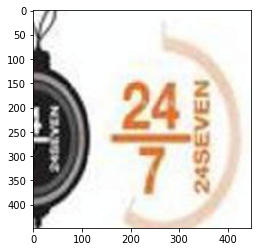

In [46]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

""
# Get a batch of training data
inputs, classes = next(iter(total_trainset))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)

In [25]:
classes

3